In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

# Import the relevant modules
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.instruct.reinforcement_learning as rl
import sousvide.synthesize.rollout_generator as rg
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df
import sousvide.visualize.plot_synthesize as ps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
cohort = "final"

# data_method = "eval_single"
data_method = "data_alpha"
# data_method = "data_beta"
eval_method = "eval_single"

scene = "button1"

courses = [
    "button_prod"
    ]   

roster = [
    # "Maverick",
    # "Rooster",
    # "PaveLow"
    ]

deployment = (cohort,courses[0],scene,eval_method)

In [ ]:
rl.PPO(cohort,scene,data_method,roster[0],1,16,100)

In [ ]:
rl.PPO(cohort,scene,data_method,roster[0],10,256,200)

In [ ]:
rl.PPO(cohort,scene,data_method,roster[0],100,128,200)

In [ ]:
# Generate Rollout Data
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/button1/splatfacto/2025-05-31_134218/nerfstudio_models/step-000029999.ckpt

Output()

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: 
Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)

 button_prod - Ideal Time Steps: [0.    3.057 4.097]

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

In [ ]:
# # Train the Policy
# tp.train_roster(cohort,roster,"histNet",200)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

In [ ]:
# # Train the Policy
# tp.train_roster(cohort,roster,"commNet",300,regen=True)
# # tp.train_roster(cohort,roster,"commNet",500,deploy,lim_sv=50)
# # tp.train_roster(cohort,roster,"commNet",300,regen=True,deployment=deployment,lim_sv=50)
# # tp.train_roster(cohort,roster,"commNet",300,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/button1/splatfacto/2025-05-31_134218/nerfstudio_models/step-000029999.ckpt

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Plotting trajectories for expert...

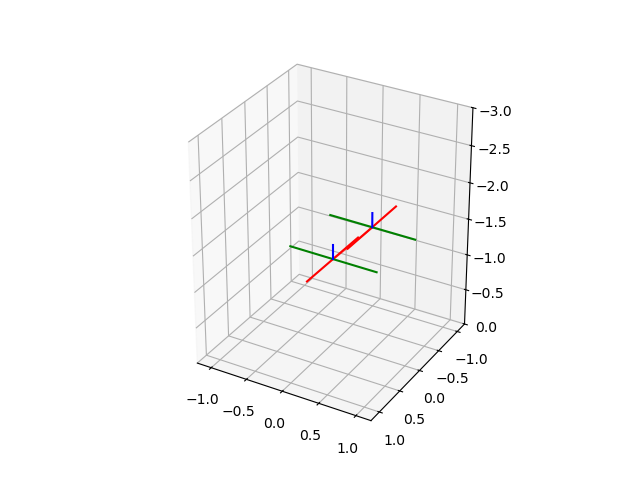

                     Deployment Summary                     
┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot  ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert │   0.10   │   0.10   │ 1.00 │  3.08   │   3.08   │
└────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [6]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,deployment,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)